<a href="https://colab.research.google.com/github/gisynw/geog386/blob/main/docs/Lectures/Week10_Geopandas_Raster/Week10_raster_Student.ipynb" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" style="height: 30px;"/>
</a>

<a href="./Week10_Geopandas_Raster/Week10_raster_Student.ipynb" target="_blank"> 
  <img src="https://img.icons8.com/?size=100&id=108635&format=png&color=000000" alt="Download" style="height: 40px;"/>
 </a>

<center>
    <h2 style="color:  #526cfe; font-family: Arial, sans-serif; font-size: 32px; padding: 10px;">
        Week 10: Rasterio and Geopandas
    </h2>
</center>

### 1. Introduction
[Rasterio](https://rasterio.readthedocs.io/en/stable/) is a Python library designed for reading, writing and analyzing geospatial raster data. It leverages the powerful [GDAL](https://gdal.org/en/latest/) (Gspatial Data Abstraction Library) to offer a streamlined interface for working with raster datasets like satellite imagery, digital elevation models (DEMs), and other gridded data. Rasterio makes it easier to manipulate and analyze raster data, particulary when integrated with otehr Python tools like Numpy, pandas, and matplotlib, make it valuable tool for geospatial data processing and analysis. 

[Geopandas](https://geopandas.org/en/stable/) is an open source project to processing geospatial data in python environment easier and efficient. GeoPandas extend the functionality from pandas to allow spatial operation on geometric types. 





### 2. Installation
Creating a clean virtual envionrment is not strictly necessary, but install all packages in the same global environment may cause dependency conflicts. So it's recommend to install the geopandas in a clean virutual environment

1. Create a virtual environment with name as 'gpd' and specify python version as 3.9
```
conda create --name gpd python=3.9
```

2. Activate virtual environment 'gpd'
```
activate gpd
```

4. Install the latest version of geopandas, rasterio and ipykernel
```
conda install -c conda-forge geopandas rasterio fiona

# Windows:
conda install ipykernel

# Mac:
pip install ipykernel
```

### 3. Get to know Geospatial Data

- [Great Smoky Mountain Geospatial Dataset](https://www.nps.gov/grsm/learn/nature/datasets.htm)
- [30-m Digital Elevation Model](https://irma.nps.gov/DataStore/Collection/Profile/34)
- [Mountain Boundary](https://irma.nps.gov/DataStore/Collection/Profile/551)

### 4. Importing libraries

In [ ]:
import geopandas as gpd
import rasterio
import os
import rasterio.plot

### 5. Reading Raster Data

In [ ]:
os.getcwd()

In [ ]:
dem_path = os.path.join(os.getcwd(),  )
dem_path

In [ ]:
dem = rasterio.open()
print(dem)

## 6. Extracting Basic Information about Raster

### 6.1 File name

In [ ]:
dem.name

### 6.3 File mode
The raster data can be opened in read-only (`r`) or write (`w`) mode. 

In [ ]:
dem.mode

### 6.4 Metadata
The metadata comes from a GeoTIFF file, which is a common format for storing geospatial raster ata, such as DEM. 
- Nodata: the value used to represent 'No data' or missing data.
- Width & Height: The number of column and row in the raster
- [Affine transformation](https://en.wikipedia.org/wiki/Affine_transformation) show the information about the pixel
    - a,b,c,d,e,f (a and e are pixel width and height, c and f are the coordinates of the upper left corner of thr raster, b and d are rotation)

In [ ]:
dem

### 6.3 Spatial Resolution

In [ ]:
dem

### 6.4 Spatial Dimensions: Width and Height

In [ ]:
dem

In [ ]:
dem

### 6.5 Spatial Bounds

In [ ]:
dem

### 6.6 Number of bands

In [ ]:
dem

## 7.Plotting Raster Data
rasterio.plot.show() is a simple way to display a raster image, showing the first band of the raster by default

### 7.1 Customizing Plots
You can further enhance your plots with color maps and titles. 

The cmap parameter in the function allows you to specify a color map to apply to the image, which controls how different values are represented in color

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(dem, cmap=, ax=ax, title="Digital Elevation Model (DEM) Great Smoky Mountain")
plt.show()

### 7.2 Overlay vector on Raster
In geographic data visualization, overlaying vector data (such as polygons) on raster data is a common technique to provide spatial context and enhance interpretation. For instance, to highlight the boundary of the Great Smoky Mountains, you can overlay a polygon vector on a raster DEM. The vector layer defines distinct boundaries or features, while the raster layer provides continuous data (elevation, temperature, etc.). This combination allows users to see how geographic features relate to underlying spatial patterns.

In [ ]:
vector_path = os.path.join(os.getcwd(),  "data\GSM_boundary\GSM_boundary.shp")
gdf = 

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(dem, cmap="terrain", ax=ax, title="Digital Elevation Model (DEM) & Boundary")
gdf.plot(ax=ax, edgecolor="red", facecolor="none", lw=2)

## 8. Masking a raster using a shapefile
Masking a raster with a shapefile is a process that extracts the raster data within a specified geographic boundary defined by the shapefile. This is useful for focusing on a particular area of interest, such as limiting a DEM to the boundary of the Great Smoky Mountains. The shapefile (a vector format) acts as a "cookie-cutter" that trims the raster, retaining only the values inside the shapefile's polygons and setting areas outside the boundary to "no data." 

In [ ]:
import fiona
import rasterio.mask

### 8.1 Read shapefile

In [ ]:
with fiona.open(vector_path, "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

### 8.2 Clip raster

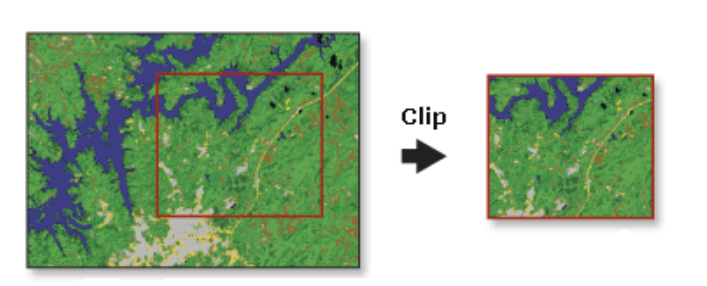

In [ ]:
out_image, out_transform = rasterio.mask.mask(dem, shapes, crop=True)

### 8.3 Update information about clipped raster

In [ ]:
out_meta = dem.meta

In [ ]:
out_image.shape

In [ ]:
out_meta.update(
    {
        "driver": "GTiff",
        "height": ,
        "width": ,
        "transform": ,
    }
)

### 8.4 Writing a masked or modified raster image to a new file called "dem_clip.tif"

In [ ]:
with rasterio.open("dem_clip.tif", "w", **out_meta) as dst:
    dst.write(out_image)

In [ ]:
clip_dem_path = os.path.join(os.getcwd(), 'dem_clip.tif')
clip_dem = rasterio.open(clip_dem_path)

fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(clip_dem, cmap="terrain", ax=ax, title="Digital Elevation Model (DEM) Great Smoky Mountain")
plt.show()
